# Continuous Bag of Words Grounder (CBoWG)

In order to shed some light about the importance of syntax to our task, we wanted to examine the impact of ignoring it. Thus, CBoWG's language model uses only a trainable words embeddings. It embeds each query by summing its words vectors and calculates the similarity between the query and each of the candidates bboxes (bounding boxes) via the cosine similarity between their embeddings. The image model remains the same as in all our models. 

In [1]:
import numpy as np
import tensorflow as tf
import json
from datetime import datetime
import os
import sys
sys.path.append('../')
sys.path.append('../models/')
from stats import stats
import retriever
from tabulate import tabulate
from CBoWG import Model

%matplotlib inline  

In [2]:
trainset_file = '../data/training/train_data.bin'
testset_file = '../data/training/test_data.bin'
vocab_file =  '../data/metadata/vocab.json'
params_dir_tmp = '../data/training/models/CBoWG/'

In [3]:
trainset = np.load(open(trainset_file, 'rb'))

# delete data points where the query length is zero
trainset = np.array([item for item in trainset if len(item[0])!=0])

testset = np.load(open(testset_file, 'rb'))

# delete data points where the query length is zero
testset = np.array([item for item in testset if len(item[0])!=0])

# loading vocabulary 
with open(vocab_file, 'r') as f:
    vocab = json.loads(f.read())
vocab['<unk>'] = len(vocab)

print("Number of words:", len(vocab))

Number of words: 8916


In [4]:
tf.reset_default_graph()
params_dir = params_dir_tmp+'params'
m = Model(
    batch_size=100, 
    img_dims=trainset[0][1][0].shape[1], 
    bbox_dims=trainset[0][1][1].shape[1], 
    lr=.05,
    vocab=vocab, 
    decay_steps=10000, 
    decay_rate=0.99,
    params_dir=params_dir
)

<p>As expected, since this model's capacity is significantly smaller than SG, overfitting is less of a problem. Moreover, unlike what we saw with SG without regularization, the loss and P@1 on both the test and train sets decrease more or less together and the loss increasement corresponds to the P@1 decreasement .</p>

<p>We can see that CBoWG gets to the optimal results at the third epoch with relatively small overfitting. This means that the cause for its poor results is not overfitting but the lack of valuable information to learn from. Therefore, we should compare it to other models with good regularization capabilities (e.g. SG+CDN) where we see much better results.</p>

In [14]:
test_res, train_res = [], []

print('params_dir:', params_dir, '\n')
tst, trn = m.train(trainset, testset,
        epochs_num=10)  

test_res.append(tst)
train_res.append(trn)

params_dir: ../data/training/models/CBoWG/params 

Initializing variables
Train, epoch: 0
epoch: 0 ;batch: 0 ;gs: 1 ;lr: 0.0500 ;loss: 2.97 ;acc: 0.510 ;iou: 0.610 ;time: 0:00:00
epoch: 0 ;batch: 100 ;gs: 101 ;lr: 0.0500 ;loss: 2.03 ;acc: 0.660 ;iou: 0.760 ;time: 0:00:14
epoch: 0 ;batch: 200 ;gs: 201 ;lr: 0.0500 ;loss: 1.99 ;acc: 0.590 ;iou: 0.660 ;time: 0:00:27
epoch: 0 ;batch: 300 ;gs: 301 ;lr: 0.0500 ;loss: 2.22 ;acc: 0.520 ;iou: 0.610 ;time: 0:00:39
epoch: 0 ;batch: 400 ;gs: 401 ;lr: 0.0500 ;loss: 1.77 ;acc: 0.770 ;iou: 0.800 ;time: 0:00:51
epoch: 0 ;batch: 500 ;gs: 501 ;lr: 0.0500 ;loss: 2.06 ;acc: 0.590 ;iou: 0.720 ;time: 0:01:04

*Train loss: 2.028 ;Train accuracy: 0.626 ;IOU accuracy: 0.705 ;Time: 0:01:16 

Testing, epoch: 0
Batch: 0 ;loss: 1.987 ;acc: 0.510 ;iou_acc: 0.640 ;time: 0:01:16
Batch: 100 ;loss: 2.200 ;acc: 0.470 ;iou_acc: 0.610 ;time: 0:01:28
Batch: 200 ;loss: 2.053 ;acc: 0.440 ;iou_acc: 0.520 ;time: 0:01:40
Batch: 300 ;loss: 1.923 ;acc: 0.540 ;iou_acc: 0.620 ;time:

Batch: 300 ;loss: 2.035 ;acc: 0.570 ;iou_acc: 0.640 ;time: 0:01:55
Batch: 400 ;loss: 2.066 ;acc: 0.480 ;iou_acc: 0.510 ;time: 0:02:08
Batch: 500 ;loss: 2.108 ;acc: 0.510 ;iou_acc: 0.590 ;time: 0:02:21

*Test loss: 2.033 ;Test accuracy 0.499 ;IOU accuracy: 0.595 ;Time: 0:02:33
Train, epoch: 7
epoch: 7 ;batch: 0 ;gs: 4159 ;lr: 0.0500 ;loss: 1.86 ;acc: 0.670 ;iou: 0.720 ;time: 0:00:00
epoch: 7 ;batch: 100 ;gs: 4259 ;lr: 0.0500 ;loss: 1.96 ;acc: 0.690 ;iou: 0.710 ;time: 0:00:13
epoch: 7 ;batch: 200 ;gs: 4359 ;lr: 0.0500 ;loss: 1.98 ;acc: 0.650 ;iou: 0.770 ;time: 0:00:26
epoch: 7 ;batch: 300 ;gs: 4459 ;lr: 0.0500 ;loss: 1.81 ;acc: 0.700 ;iou: 0.770 ;time: 0:00:39
epoch: 7 ;batch: 400 ;gs: 4559 ;lr: 0.0500 ;loss: 2.07 ;acc: 0.620 ;iou: 0.650 ;time: 0:00:52
epoch: 7 ;batch: 500 ;gs: 4659 ;lr: 0.0500 ;loss: 1.94 ;acc: 0.670 ;iou: 0.730 ;time: 0:01:05

*Train loss: 1.910 ;Train accuracy: 0.689 ;IOU accuracy: 0.752 ;Time: 0:01:18 

Testing, epoch: 7
Batch: 0 ;loss: 2.231 ;acc: 0.390 ;iou_acc: 0.

Train accuracy:0.626
Test accuracy:0.458
Train P@1:0.705
Test P@1:0.556
Train loss:1.792
Test loss:1.932


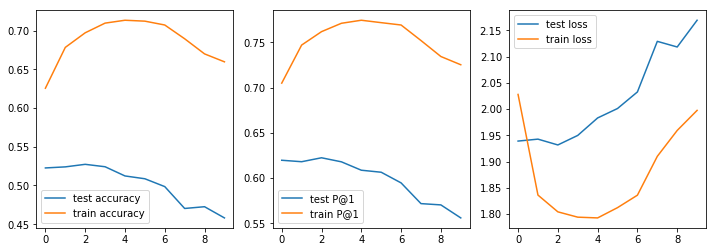

---------------------------------------------------------------------------------------------------- 



In [21]:
f = stats([tst], [trn], epochs=10, params=[200])